In [89]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
df['date_added'].isnull().sum()

11

In [7]:
df = df.drop(columns=['show_id'])

In [8]:
#Primeira pergunta, qual diretor ou diretores dirigiram mais filmes
df['director'].value_counts().index[0]

'Raúl Campos, Jan Suter'

In [9]:
df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [10]:
dic = {'TV-PG': '7+' , 'TV-Y7': '7+' , 'TV-Y7-FV': '7+' , 'TV-MA': '18+' , 'TV-14': '16+' , 'R':'18+','TV-Y':'Todos','NR':'18+'
       ,'PG-13':'13+','TV-G':'Todos','PG':'7+','G':'Todos','NC-17':'18+' ,'UR':'Não Classificado'}

In [11]:
df['rating'] = df['rating'].map(dic)

In [12]:
df[df['type'] =='TV Show']['rating'].value_counts()

18+      697
16+      660
7+       438
Todos    172
Name: rating, dtype: int64

In [13]:
#Qual faixa etária possui mais filmes 
df[df['type'] =='Movie']['rating'].value_counts()

18+                 2058
16+                 1038
7+                   711
13+                  286
Todos                157
Não Classificado       7
Name: rating, dtype: int64

In [14]:
df[df['rating'] == 'Não Classificado']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
332,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,"September 1, 2019",2008,Não Classificado,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...
799,Movie,Good Luck Chuck,Mark Helfrich,"Dane Cook, Jessica Alba, Dan Fogler, Ellia Eng...","United States, Canada","October 1, 2019",2007,Não Classificado,99 min,"Comedies, Romantic Movies","Every time Chuck breaks up with a girlfriend, ..."
1754,Movie,Shootout at Lokhandwala,Apoorva Lakhia,"Sanjay Dutt, Sunil Shetty, Amitabh Bachchan, A...",India,"May 15, 2019",2007,Não Classificado,116 min,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follow..."
2461,Movie,Immoral Tales,Walerian Borowczyk,"Lise Danvers, Fabrice Luchini, Charlotte Alexa...",France,"June 6, 2019",1974,Não Classificado,103 min,"Dramas, International Movies, Romantic Movies",This anthology illustrates the timeless nature...
3029,Movie,Sex Doll,Sylvie Verheyde,"Hafsia Herzi, Ash Stymest, Karole Rocher, Paul...","United Kingdom, France","July 10, 2017",2016,Não Classificado,103 min,"Dramas, International Movies, Romantic Movies",A high-end call girl falls for a handsome man ...
3441,Movie,Aquarius,Kleber Mendonça Filho,"Sonia Braga, Maeve Jinkings, Irandhir Santos, ...","Brazil, France","January 13, 2017",2016,Não Classificado,146 min,"Dramas, International Movies",The final holdout in her historic beachside bu...
4436,Movie,White Girl,Elizabeth Wood,"Morgan Saylor, Brian 'Sene' Marc, Justin Barth...",United States,"December 2, 2016",2016,Não Classificado,90 min,"Dramas, Independent Movies",A college girl romping through New York City i...


In [15]:
#Quais filmes com categoria não classificados existem?
indices = [df[df['rating'] == 'Não Classificado'].index[i]  for i in range(len(df[df['rating'] == 'Não Classificado']))]
df['title'].loc[indices]

332     You Don't Mess with the Zohan
799                   Good Luck Chuck
1754          Shootout at Lokhandwala
2461                    Immoral Tales
3029                         Sex Doll
3441                         Aquarius
4436                       White Girl
Name: title, dtype: object

In [17]:
df['date_added'] = pd.to_datetime(df['date_added'])

<AxesSubplot:>

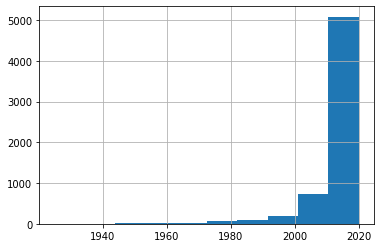

In [125]:
df['release_year'].hist()

### Centralidade e dispersão

In [127]:
print(df['release_year'].mean())
print(df['release_year'].std())
print(df['release_year'].median())
print(df['release_year'].var())
print(df['release_year'].mode())

2013.3593198588387
8.811620351521556
2016.0
77.64465321934887
0    2018
dtype: int64


In [150]:
print(df['rating'].value_counts().mean())
print(df['rating'].value_counts().std())
print(df['rating'].value_counts().median())
print(df['rating'].value_counts().var())

1037.3333333333333
1051.3946293693282
739.0
1105430.6666666667


### Boxplots

<AxesSubplot:>

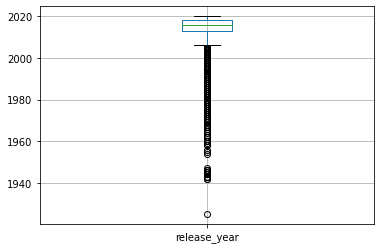

In [142]:
df.boxplot(column=['release_year'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22080c45908>,
 'caps': [<matplotlib.lines.Line2D at 0x22080c40f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2208025c8c8>],
 'medians': [<matplotlib.lines.Line2D at 0x22080d077c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22080c62fc8>],
 'means': []}

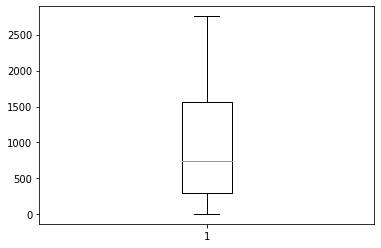

In [143]:
plt.boxplot(df['rating'].value_counts())